<a href="https://colab.research.google.com/github/ohhongseok/ML-DeepLearning/blob/main/8/8-3/%ED%95%A9%EC%84%B1%EA%B3%B1_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9D%98_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 이번장 키워드
 - 가중치 시각화
 - 특성 맵 시각화
 - 함수형 API

이번장에서는 가중치와 특성맵을 그림으로 시각화 함 > 신경망 동작원리 이해

# 가중치 시각화
 - 합성곱 층은 여러 필터를 통해 이미지에서 특징을 학습함
 - 각각의 필터는 커널이라 부르는 가중치와 절편이 있음
 - 이중 절편은 시각적으로 의미가 있지 않음
 - 가중치의 경우 이미지 데이터의 어떠한 ***특징을*** 두드러지가 나타내는 특징이 있음

In [1]:
from tensorflow import keras
!wget https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.h5


--2022-01-17 11:33:15--  https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.h5
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.h5 [following]
--2022-01-17 11:33:16--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4049416 (3.9M) [application/octet-stream]
Saving to: ‘best-cnn-model.h5’

best-cnn-model.h5   100%[===================>]   3.86M  --.-KB/s    in 0.05s   

2022-01-17 11:33:16 (78.8 MB/s) - ‘best-cnn-model.h5’ saved [4049416/4049416]



In [2]:
model = keras.models.load_model('best-cnn-model.h5')

In [3]:
# 앞장에서 어떠한 가중치를 확인했는지를 확인해 보기(layer 확인)
# 앞장에서 추가했던 합성곱 및 밀집층이 있는것 확인
model.layers

# weights 속성
 - 각각의 층마다 두개의 리스트 weights[0],weights[1]을 가지고 있음
 - 첫번째 리스트에서는 커널의 크기(3,3,1), 필터의 크기(32)를 통해 가중치 나타냄
 - 두번째 리스트에서는 필터의 크기만큼 존재하는 절편의 개수 
  > 32개로 필터의 개수랑 동일해야 함, 하나의 필터는 하나의 절편을 가지고 있음 

In [4]:
# 첫번째 합성곱 층의 가중치 조사
conv = model.layers[0]
# 각 층마다의 가중치는 weights 속성에 저장되어 있음
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [5]:
# 전체 가중치를 tensor 클래스의 객체에서 numpy 메서드로 변경 후 평균과 표준편차 계산
conv_weights = conv.weights[0].numpy()

print(conv_weights.mean(), conv_weights.std())

-0.0065098377 0.22782646


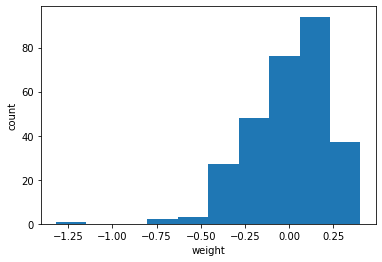

In [6]:
# 가중치에 대해 히스토그램 그려보기
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

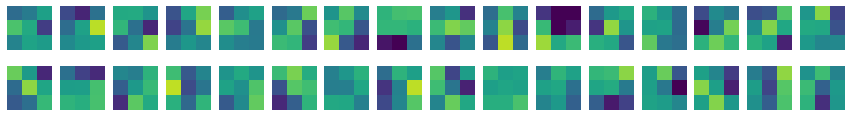

In [7]:
# 순서대로 32개의 커널을 출력해 보기
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

# 훈련하지 않은 빈 합성곱 신경망의 시각화 결과랑 비교해보기

In [8]:
# 빈 합성곱 층 생성
no_training_model = keras.Sequential()

no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', 
                                          padding='same', input_shape=(28,28,1)))

# 위에서 만든 모델의 가중치를 no_training_conv에 저장
no_training_conv = no_training_model.layers[0]

# 앞서 보았던 shape와 동일한 구조임을 확인
print(no_training_conv.weights[0].shape, no_training_conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [9]:
# 넘파이 배열로 변환하여 시각화 해보기
no_training_weights = no_training_conv.weights[0].numpy()

print(no_training_weights.mean(), no_training_weights.std())

-0.0037847762 0.08075323


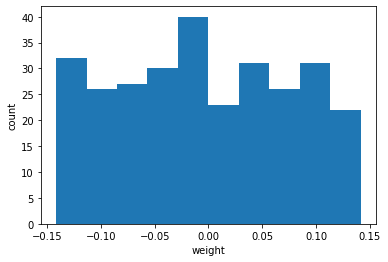

In [10]:
# 훈련하지 않은 모델의 가중치 출력해보기
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()
# 비교적 고른 분포를 가지고 있고, 이는 텐서플로우가 신경망 가중치를 처음 초기화 할 때
# 균등분포에서 랜덤하게 값 선택해서 이렇게 나옴

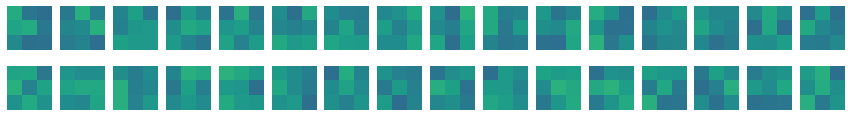

In [11]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()
# 그림도 위의 히스토그램과 마찬가지로 특정 부분이 밝은것이 아닌, 전체적으로 고르게 나타남
# 위에 그림에서는 특정 패턴의 부분만 학습한것고 달리 여기에서는 전체적으로 고른 상태의 그림임을
# 알 수 있음

# 함수형 API
 - 앞선 장에서 모델의 설계방식은 Sequential API를 활용하여 만든것이다.
 - 이러한 방식으로 만든 경우, 여러 층을 공유하거나 다양한 종류의 입력과 출력을 사용하는 등<BR> 복잡한 모델을 만드는데에는 한계가 있음
 - 함수형 API는 각 층을 함수로서 정의하여 이를 이용해 신경망을 설계한다.
 - 이러한 과정을 통해 좀 더복잡한 모델을 만들 수 있게 된다.

In [12]:
print(model.input)
# 함수형 api를 통해 input과 model.layers[0].output을 연결하는 새로운 conv_aci 모델을 만들 수 있음
conv_acti = keras.Model(model.input, model.layers[0].output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


# 특성맵 시각화
 - 

4431872/4422102 [==============================] - 0s 0us/step


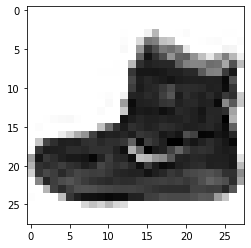

In [13]:
# 패션 데이터 받은 후 첫번째 데이터 그려보기
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

# 첫번째 이미지 그리기
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [14]:
# 앞서 만든 conv_act 모델에 주입하여 특성맵 출력해보기

# 첫번째 데이터에 대한 특성 추출
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0

feature_maps = conv_acti.predict(inputs)

# 첫번째 이미지에 대한 feature_maps의 크기
print(feature_maps.shape)

(1, 28, 28, 32)


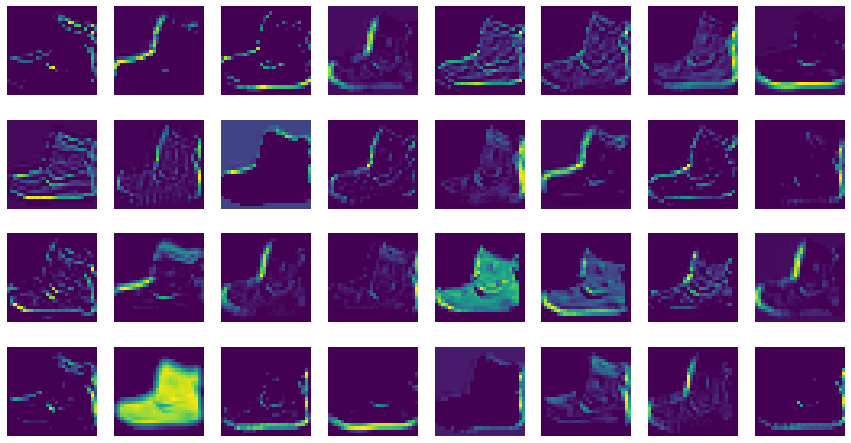

In [15]:
# 학습한 특성의 특성맵 출력해보기,
# 총 32개의 필터가 있기에 32개의 속성이 출력된다.

fig, axs = plt.subplots(4, 8, figsize=(15,8))

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()
# 각 이미지에서는 강하게 특성을 추출하는 부분을 알 수 있음

In [17]:
# 두번째 합성곱층이 생성한 특성맵도 확인 할 수 있음
conv2_acti = keras.Model(model.input, model.layers[2].output)
feature_maps = conv2_acti.predict(train_input[0:1].reshape(-1, 28, 28, 1)/255.0)
# 풀링층으로 인해 사이즈가 절반으로 줄었고, 필터의 개수를 64개로 늘렸음을 알 수있음
# 앞장에서 정의한 모델의 사이즈 그대로
print(feature_maps.shape) 

(1, 14, 14, 64)


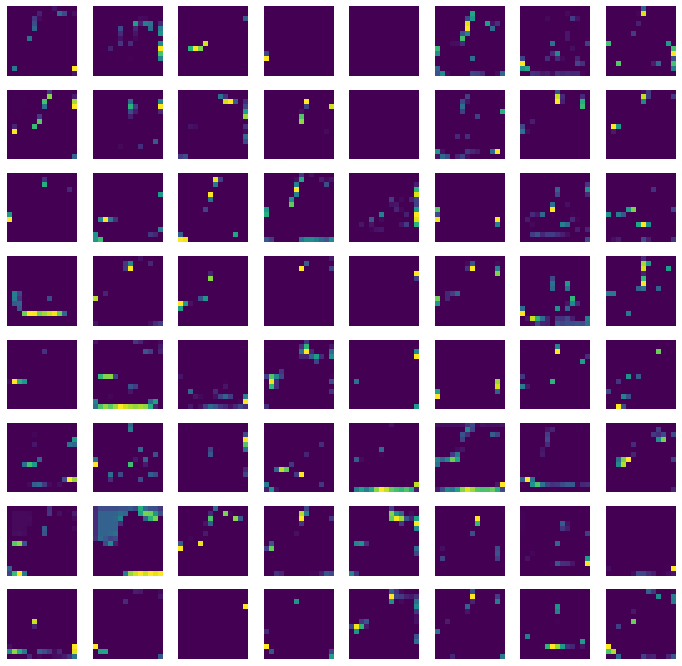

In [18]:
# 트레이닝 데이터 1개에 대해 64개의 특성맵을 그려보자

fig, axs = plt.subplots(8, 8, figsize=(12,12))

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

# 이 결과로 알 수있는것
 - 첫번째 층에서는 데이터에 대해 특성을 잘 알아낼 수있었음
 - 두번째 층을 확인해 본 결과 앞서 생성된 층 (14,14,32) 에서 어떠한 부위를 감지하는지 직관적으로 이해하기 힘듦
 - 이러한 현상은(층의 뒤로 갈수록 특성에 대해 직관적으로 이해하지 못하는 것) 모델의 층을 쌓을수록 더욱 심해짐
 - 이를통해 앞쪽의 층이 이미지의 시각적 정보를 감지하고 뒤쪽에 층은 앞쪽 층의 정보를 바탕으로 추상적인 정보를 학습 하는것을  알 수 있음